# Getting Started

**This is not the finished tutorial. I am just testing the docker image**
This notebook give a quick example of how scikit-gstat can be used to create meaningful variograms and utilize kriging classes to perform an interpolation.

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from skgstat import Variogram, OrdinaryKriging
plt.style.use('ggplot')
os.environ['SKG_SUPPRESS'] = "true"

The data is located in the `./data` subdirectory. We can load one of the examples and have a look at the data:

In [2]:
data = pd.read_csv('./data/sample_sr.csv')
data.head()

,x,y,z
0,94,20,-0.394444
1,82,37,-2.283663
2,43,13,-0.546213
3,78,42,-3.681384
4,50,28,0.504538


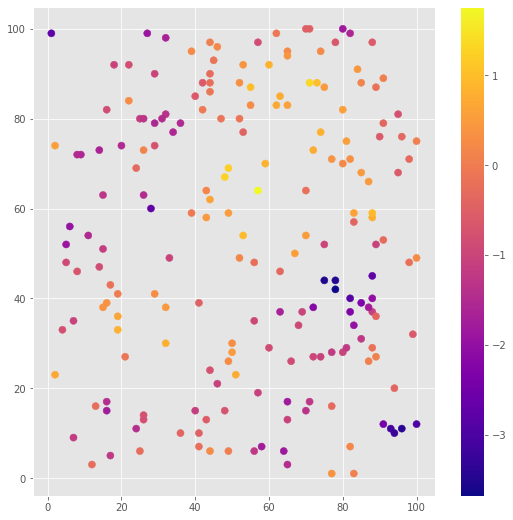

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
art = ax.scatter(data.x,data.y, s=50, c=data.z, cmap='plasma')
plt.colorbar(art)

## Build a Variogram

e:\dropbox\python\scikit-gstat\skgstat\Variogram.py:1668: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


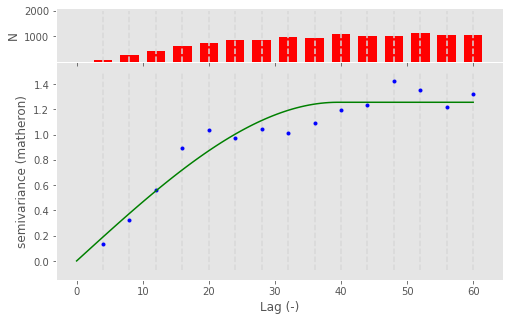

In [4]:
V = Variogram(data[['x', 'y']].values, data.z.values, normalize=False, maxlag=60, n_lags=15)
fig = V.plot()

## Kriging

In [5]:
ok = OrdinaryKriging(V, min_points=5, max_points=15, mode='exact')

In [6]:
# build the target grid
xx, yy = np.mgrid[0:99:100j, 0:99:100j]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

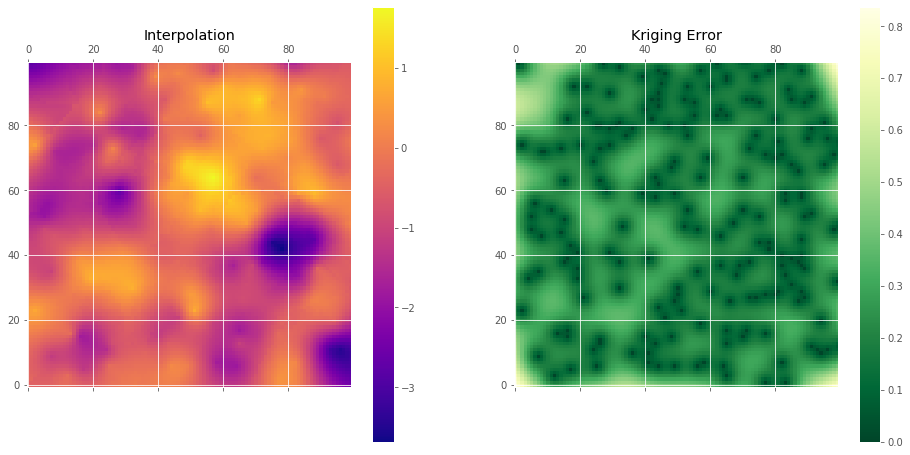

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

art = axes[0].matshow(field.T, origin='lower', cmap='plasma')
axes[0].set_title('Interpolation')
plt.colorbar(art, ax=axes[0])
art = axes[1].matshow(s2.T, origin='lower', cmap='YlGn_r')
axes[1].set_title('Kriging Error')
plt.colorbar(art, ax=axes[1])